In [1]:
#import module and Data
import json
import requests
import re,string,timeit
import time
import pandas as pd
import os
from dotenv import load_dotenv
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Data cleaning Process and feartures dataset join and concat in Notebook: Syd_House_Predictor_DataPrep

In [2]:
df_syd=pd.read_csv('./Resources/df_merge_final.csv')
df_syd=df_syd.drop(columns='Unnamed: 0')
df_syd.sample(10)

,price,Postcode,suburb,propertyType,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Assault,Incidents of Robbery
133,2275000.0,2033,kensington,Semi,2,1.0,0.0,75873,5.871312,0.19,4310.9,981.0,32.0
178,2300000.0,2042,newtown,House,3,1.0,0.0,79147,3.328855,0.15,5707.5,1094.0,64.0
260,1600000.0,2153,winston hills,House,4,2.0,2.0,69184,2.650973,0.25,3105.1,1707.0,94.0
33,926000.0,2148,blacktown,House,3,1.0,2.0,51910,5.023561,0.12,1594.8,4283.0,208.0
197,1350000.0,2213,picnic point,House,5,2.0,2.0,62064,2.615610,0.20,3450.8,2437.0,110.0
531,2520000.0,2230,woolooware,Duplex,4,3.0,2.0,86020,1.916321,0.21,696.6,1238.0,28.0
67,1025000.0,2034,coogee,Unit,2,1.0,0.0,99267,2.389052,0.20,4310.9,981.0,32.0
299,4200000.0,2026,bondi,House,3,2.0,0.0,103604,2.819807,0.15,7943.4,482.0,11.0
528,1860000.0,2145,westmead,House,3,1.0,3.0,58988,5.968720,0.17,3105.1,1707.0,94.0
496,960000.0,2147,seven hills,House,3,1.0,2.0,57436,4.402026,0.16,1594.8,4283.0,208.0


# Data Prep

In [3]:
df_syd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       538 non-null    float64
 1   Postcode                    538 non-null    int64  
 2   suburb                      538 non-null    object 
 3   propertyType                538 non-null    object 
 4   bedrooms                    538 non-null    int64  
 5   bathrooms                   538 non-null    float64
 6   carspaces                   538 non-null    float64
 7   income_ITR                  538 non-null    int64  
 8   Un_rate_%                   538 non-null    float64
 9   renter_rate                 538 non-null    float64
 10  Population_density_ppl_km2  538 non-null    float64
 11  Incidents of Assault        538 non-null    float64
 12  Incidents of Robbery        538 non-null    float64
dtypes: float64(8), int64(3), object(2)


In [4]:
df_syd.describe().T

,count,mean,std,min,25%,50%,75%,max
price,538.0,1.820939e+06,1.203653e+06,327000.00,1.023500e+06,1.464500e+06,2.278750e+06,9.300000e+06
Postcode,538.0,2.139316e+03,1.061996e+02,2007.00,2.072000e+03,2.135500e+03,2.193000e+03,2.770000e+03
bedrooms,538.0,3.276952e+00,1.281391e+00,0.00,2.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
bathrooms,538.0,1.871747e+00,8.324769e-01,1.00,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
carspaces,538.0,1.684015e+00,1.079936e+00,0.00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01
income_ITR,538.0,7.571121e+04,2.601717e+04,38575.00,5.743600e+04,6.998300e+04,8.927800e+04,1.998420e+05
Un_rate_%,538.0,3.508712e+00,1.125220e+00,0.00,2.652446e+00,3.250908e+00,4.331986e+00,6.909411e+00
renter_rate,538.0,1.868030e-01,4.369995e-02,0.08,1.600000e-01,1.800000e-01,2.200000e-01,2.900000e-01
Population_density_ppl_km2,538.0,3.310204e+03,2.518139e+03,3.80,1.078000e+03,3.341550e+03,4.310900e+03,9.301000e+03
Incidents of Assault,538.0,1.546610e+03,1.140416e+03,45.00,6.470000e+02,1.127000e+03,2.437000e+03,4.283000e+03


In [5]:
#it is noted that the min val of bedrooms is NIL, hence checked data to ensure it is not vacant land
#bedroom number is NIL being studio style unit in estern suburbs
df_syd[df_syd['bedrooms']==0]

,price,Postcode,suburb,propertyType,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Assault,Incidents of Robbery
41,785000.0,2024,bronte,Studio,0,1.0,1.0,136652,2.515959,0.20,7943.4,482.0,11.0
141,930000.0,2060,lavender bay,Unit,0,1.0,1.0,126865,2.355713,0.20,7161.6,235.0,5.0
265,790000.0,2011,woolloomooloo,Unit,0,1.0,1.0,105840,3.404255,0.16,9301.0,3582.0,163.0


In [6]:
set(df_syd['propertyType'])

{'Duplex', 'House', 'Semi', 'Studio', 'Terrace', 'Townhouse', 'Unit', 'Villa'}

### to convert PropertyTypes to scores according to its popularity and market demand 

In [7]:
dict1={'House':100,'Duplex':85,'Semi':80,'Villa':80,'Townhouse':75,'Terrace':70,'Unit':50,'Studio':30}


In [8]:
len(df_syd['propertyType'])

538

In [9]:
df_syd_housing1=df_syd.copy()
propertType_list = df_syd_housing1['propertyType'].to_list()
for i in range(len(df_syd_housing1['propertyType'])):
   
    for k,v in dict1.items():
            if propertType_list[i] == k:
                propertType_list[i]=v

# print(propertType_list[5])
propertType_list[:10]
df_syd_housing1['propertyType'] = pd.DataFrame({'propertyType':propertType_list})


In [10]:


df_syd_housing1.head(5)

,price,Postcode,suburb,propertyType,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Assault,Incidents of Robbery
0,1240000.0,2176,abbotsbury,100,4,2.0,2.0,54321,3.012746,0.21,2077.0,1397.0,79.0
1,1155000.0,2763,acacia gardens,100,4,2.0,2.0,59694,3.755216,0.16,1594.8,4283.0,208.0
2,1100500.0,2015,alexandria,50,2,1.0,1.0,86569,2.789934,0.17,9301.0,3582.0,163.0
3,1530000.0,2234,alfords point,100,4,2.0,4.0,70769,2.730109,0.21,696.6,1238.0,28.0
4,750000.0,2218,allawah,50,3,1.0,1.0,53511,5.150125,0.18,4179.6,805.0,25.0


In [11]:
mask3=df_syd_housing1['propertyType']==100
df_syd_housing1=df_syd_housing1[mask3]
df_syd_housing1=df_syd_housing1.drop(columns=['propertyType'])



In [12]:
df_syd_housing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 537
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       360 non-null    float64
 1   Postcode                    360 non-null    int64  
 2   suburb                      360 non-null    object 
 3   bedrooms                    360 non-null    int64  
 4   bathrooms                   360 non-null    float64
 5   carspaces                   360 non-null    float64
 6   income_ITR                  360 non-null    int64  
 7   Un_rate_%                   360 non-null    float64
 8   renter_rate                 360 non-null    float64
 9   Population_density_ppl_km2  360 non-null    float64
 10  Incidents of Assault        360 non-null    float64
 11  Incidents of Robbery        360 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 36.6+ KB


## Exploratory Data Analysis

<AxesSubplot:>

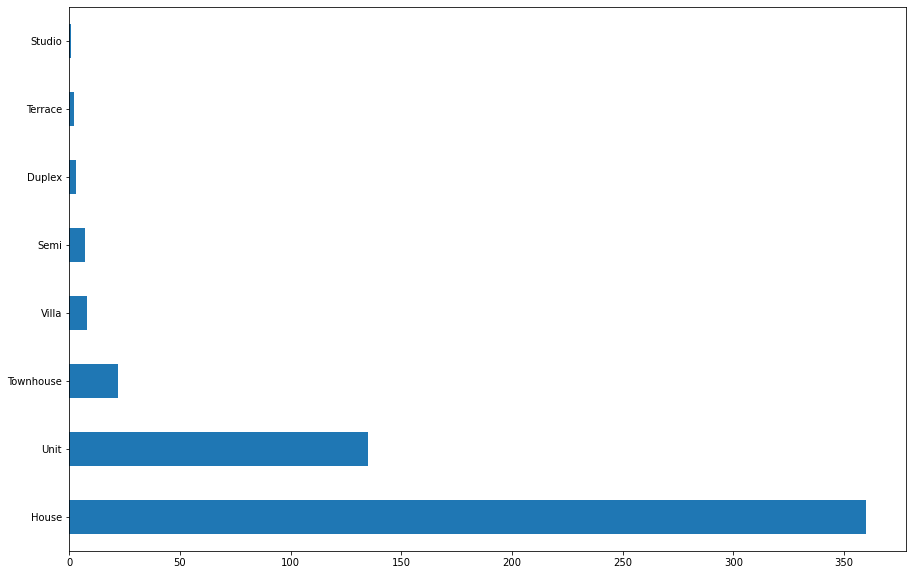

In [13]:
# plot to see the popularity ranking of different property type
plt.figure(figsize=(15,10))
df_syd['propertyType'].value_counts().plot.barh()

<AxesSubplot:>

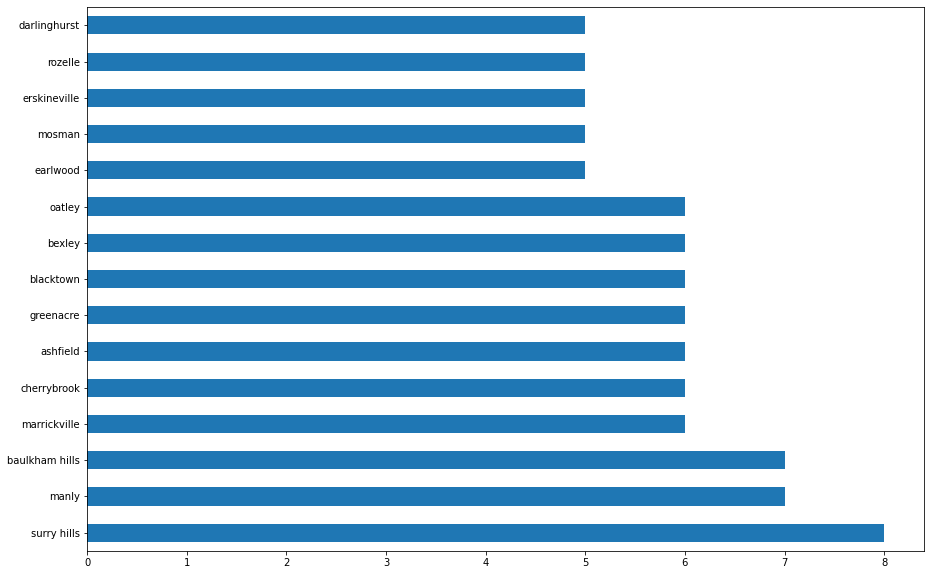

In [14]:
plt.figure(figsize=(15,10))
df_syd['suburb'].value_counts()[:15].plot.barh()

# Data Visualization

In [15]:
sns.set_style("whitegrid")

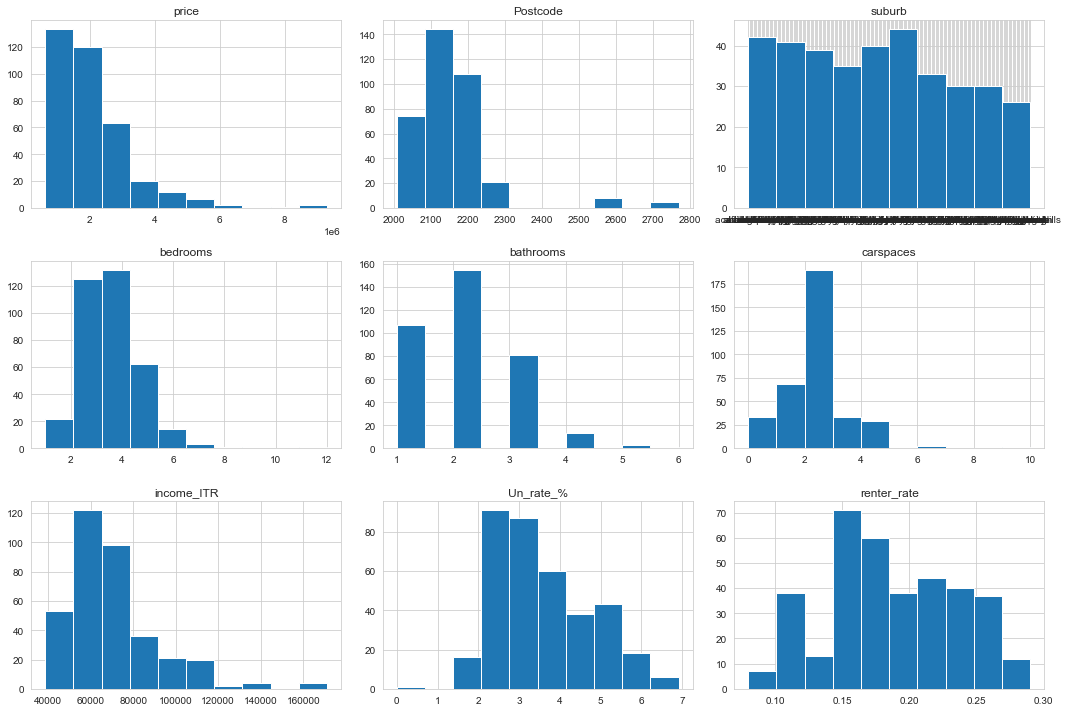

In [16]:
rows = 3
cols = 3

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,10))

col = df_syd_housing1.columns
index = 0

for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(df_syd_housing1[col[index]])
        ax[i][j].set_title(col[index])
        index = index + 1
        
plt.tight_layout()
plt.show()

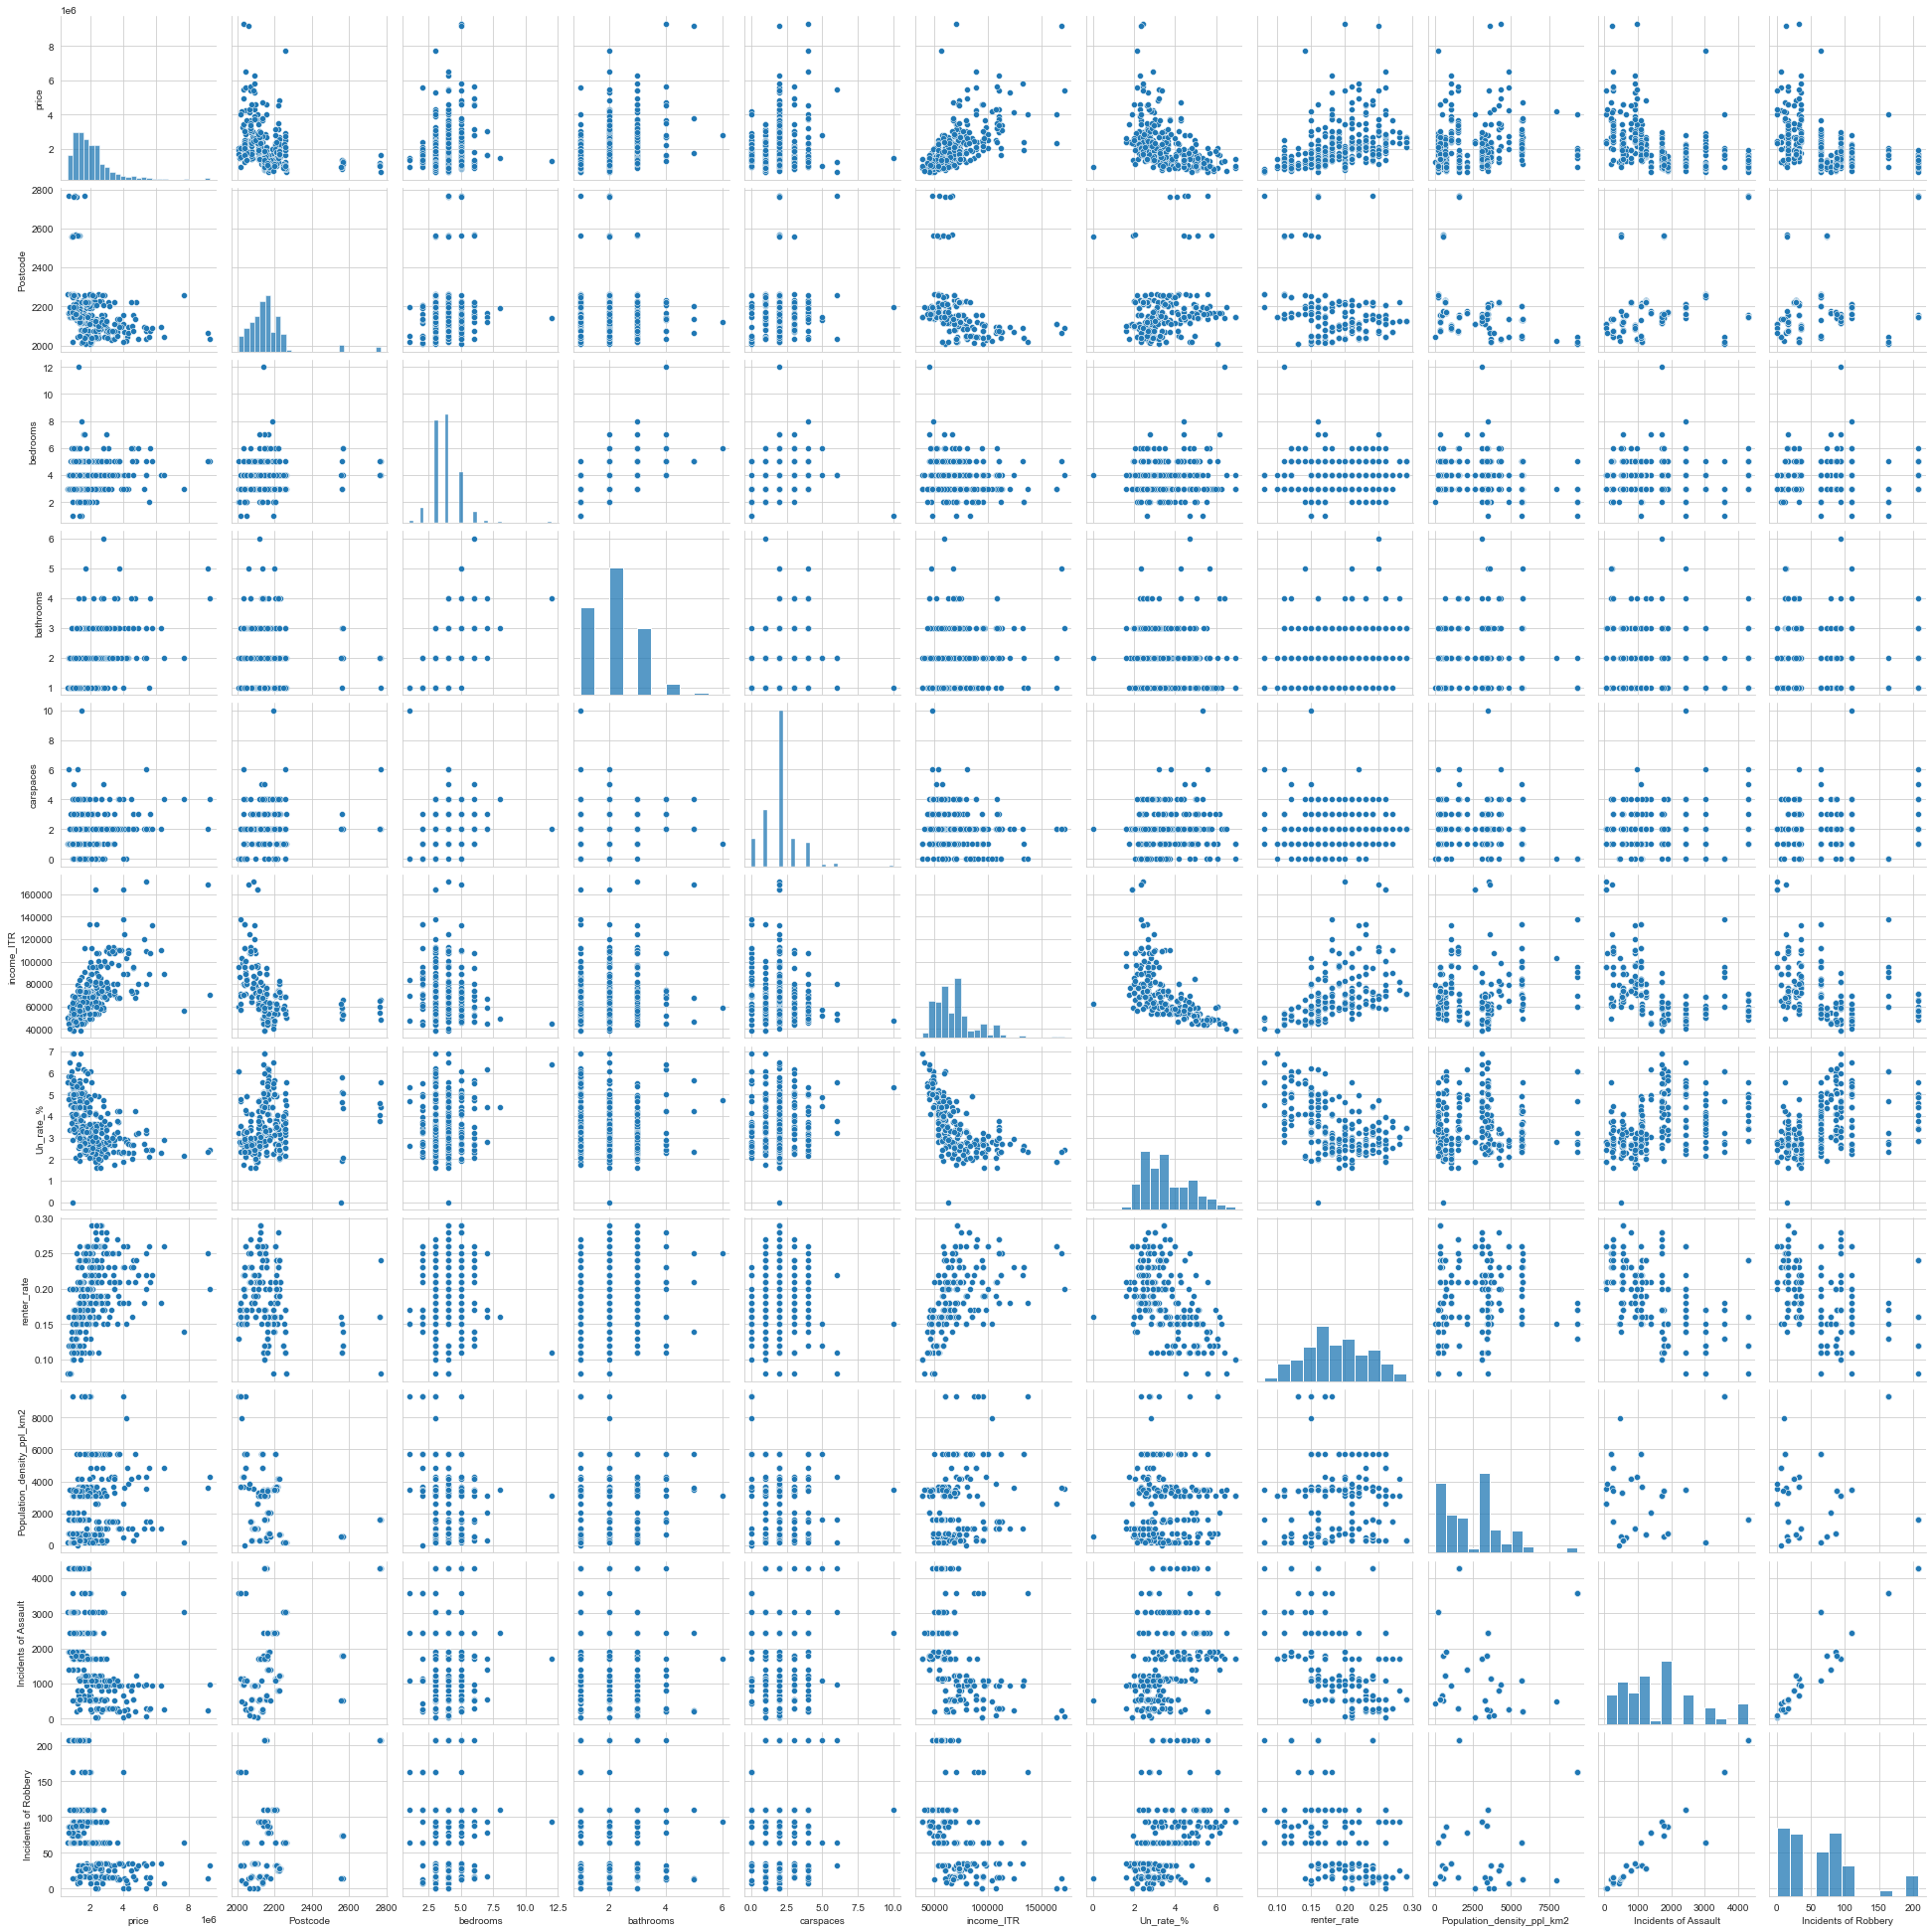

In [18]:
sns.pairplot(df_syd_housing1) # plot in diagonal line indicates each feature's distn pattern

In [19]:
corrmat = df_syd_housing1.corr()
corrmat

,price,Postcode,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Assault,Incidents of Robbery
price,1.000000,-0.324408,0.171586,0.402720,0.145018,0.632019,-0.454809,0.416114,0.118643,-0.440944,-0.442302
Postcode,-0.324408,1.000000,0.131851,-0.014630,0.175223,-0.371557,0.169538,-0.250505,-0.331401,0.367592,0.265920
bedrooms,0.171586,0.131851,1.000000,0.653767,0.221379,-0.066738,0.019135,0.091437,-0.214673,-0.026201,-0.004020
bathrooms,0.402720,-0.014630,0.653767,1.000000,0.230081,0.147439,-0.164607,0.245238,-0.142882,-0.176837,-0.171355
carspaces,0.145018,0.175223,0.221379,0.230081,1.000000,-0.129372,0.039937,0.062758,-0.199597,-0.010066,-0.022497
income_ITR,0.632019,-0.371557,-0.066738,0.147439,-0.129372,1.000000,-0.622517,0.515272,0.116178,-0.474091,-0.421532
Un_rate_%,-0.454809,0.169538,0.019135,-0.164607,0.039937,-0.622517,1.000000,-0.554742,0.105375,0.425169,0.477268
renter_rate,0.416114,-0.250505,0.091437,0.245238,0.062758,0.515272,-0.554742,1.000000,0.021551,-0.521194,-0.424403
Population_density_ppl_km2,0.118643,-0.331401,-0.214673,-0.142882,-0.199597,0.116178,0.105375,0.021551,1.000000,-0.020098,0.135266
Incidents of Assault,-0.440944,0.367592,-0.026201,-0.176837,-0.010066,-0.474091,0.425169,-0.521194,-0.020098,1.000000,0.920874


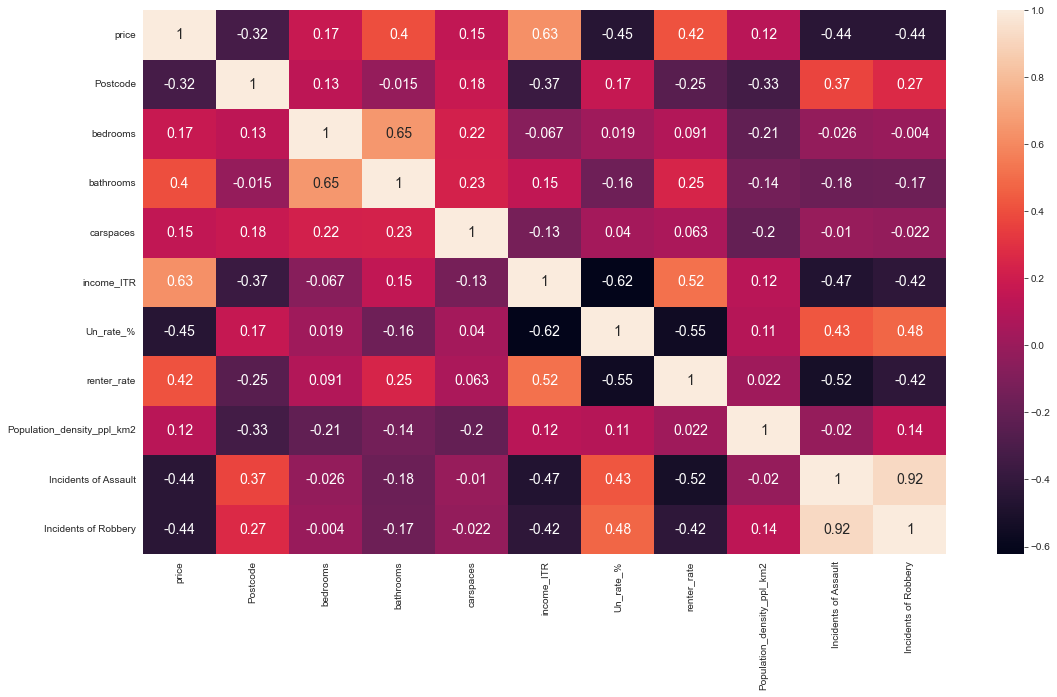

In [20]:
plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size':14})
plt.show()

## Train Test Split and Model Training

In [21]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
X = df_syd_housing1.drop(columns=['price','suburb','Postcode','Incidents of Assault'], axis=1)
X.head()

,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Robbery
0,4,2.0,2.0,54321,3.012746,0.21,2077.0,79.0
1,4,2.0,2.0,59694,3.755216,0.16,1594.8,208.0
3,4,2.0,4.0,70769,2.730109,0.21,696.6,28.0
5,3,1.0,3.0,55552,3.817229,0.15,3637.4,32.0
10,4,2.0,5.0,57071,4.482091,0.15,5707.5,64.0


In [24]:
y = df_syd_housing1['price']
y.head()

0     1240000.0
1     1155000.0
3     1530000.0
5     1260800.0
10    2809000.0
Name: price, dtype: float64

## Train Test Split and Model Training Without Features Preprocessing

In [25]:
y = df_syd_housing1['price']
y.head()



0     1240000.0
1     1155000.0
3     1530000.0
5     1260800.0
10    2809000.0
Name: price, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=0)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [28]:
print('Without Preprocessing MSE: ', mean_squared_error(y_test, y_pred))

Without Preprocessing MSE:  458834572036.6483


In [29]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Standardized MSE: ', mean_squared_error(y_test, y_pred))

Standardized MSE:  458834572035.8892


### Standardization 

In [30]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
  X,y,test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Standardized MSE: ', mean_squared_error(y_test, y_pred))

Standardized MSE:  458834572035.8892


### Normalization 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
   X,y, test_size=0.2, random_state=0)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Normalized MSE: ', mean_squared_error(y_test, y_pred))


Normalized MSE:  458834572035.88934


In [34]:
X_test[:5]

,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Robbery
12,4,3.0,2.0,97052,2.313755,0.19,1078.0,35.0
335,3,1.0,3.0,69321,2.589641,0.18,335.0,17.0
159,5,3.0,2.0,53284,4.723618,0.11,205.7,64.0
326,5,2.0,2.0,71111,3.458933,0.29,335.0,17.0
134,4,2.0,4.0,89278,2.311133,0.23,475.9,33.0


In [36]:
model.coef_ # please refer to the above columns for order of features

array([ 4.10044207e+04,  3.42773618e+05,  1.91575148e+05,  3.08946304e+01,
       -6.41426906e+04, -1.03688759e+06,  1.07171261e+02, -4.09668371e+03])

# INTERACITVE PANEL for Price Predictor

In [37]:
 pd.DataFrame(columns=df_syd_housing1.columns)
    

,price,Postcode,suburb,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Assault,Incidents of Robbery


Column
    [0] Column
        [0] FloatInput(name='Postcode', start=2000, step=1, value=2000)
        [1] IntSlider(end=20, name='Number of Rooms')
        [2] IntSlider(end=10, name='Number of Bathrooms')
        [3] IntSlider(end=10, name='Number of Carspaces')
    [1] Row
        [0] Column
            [0] Markdown(str)
            [1] JPG(str, width=600)
            [2] Tabulator(value=   bedrooms  b...)
            [3] Number(format='${value:,d}', name='Predicted Price', value=0)
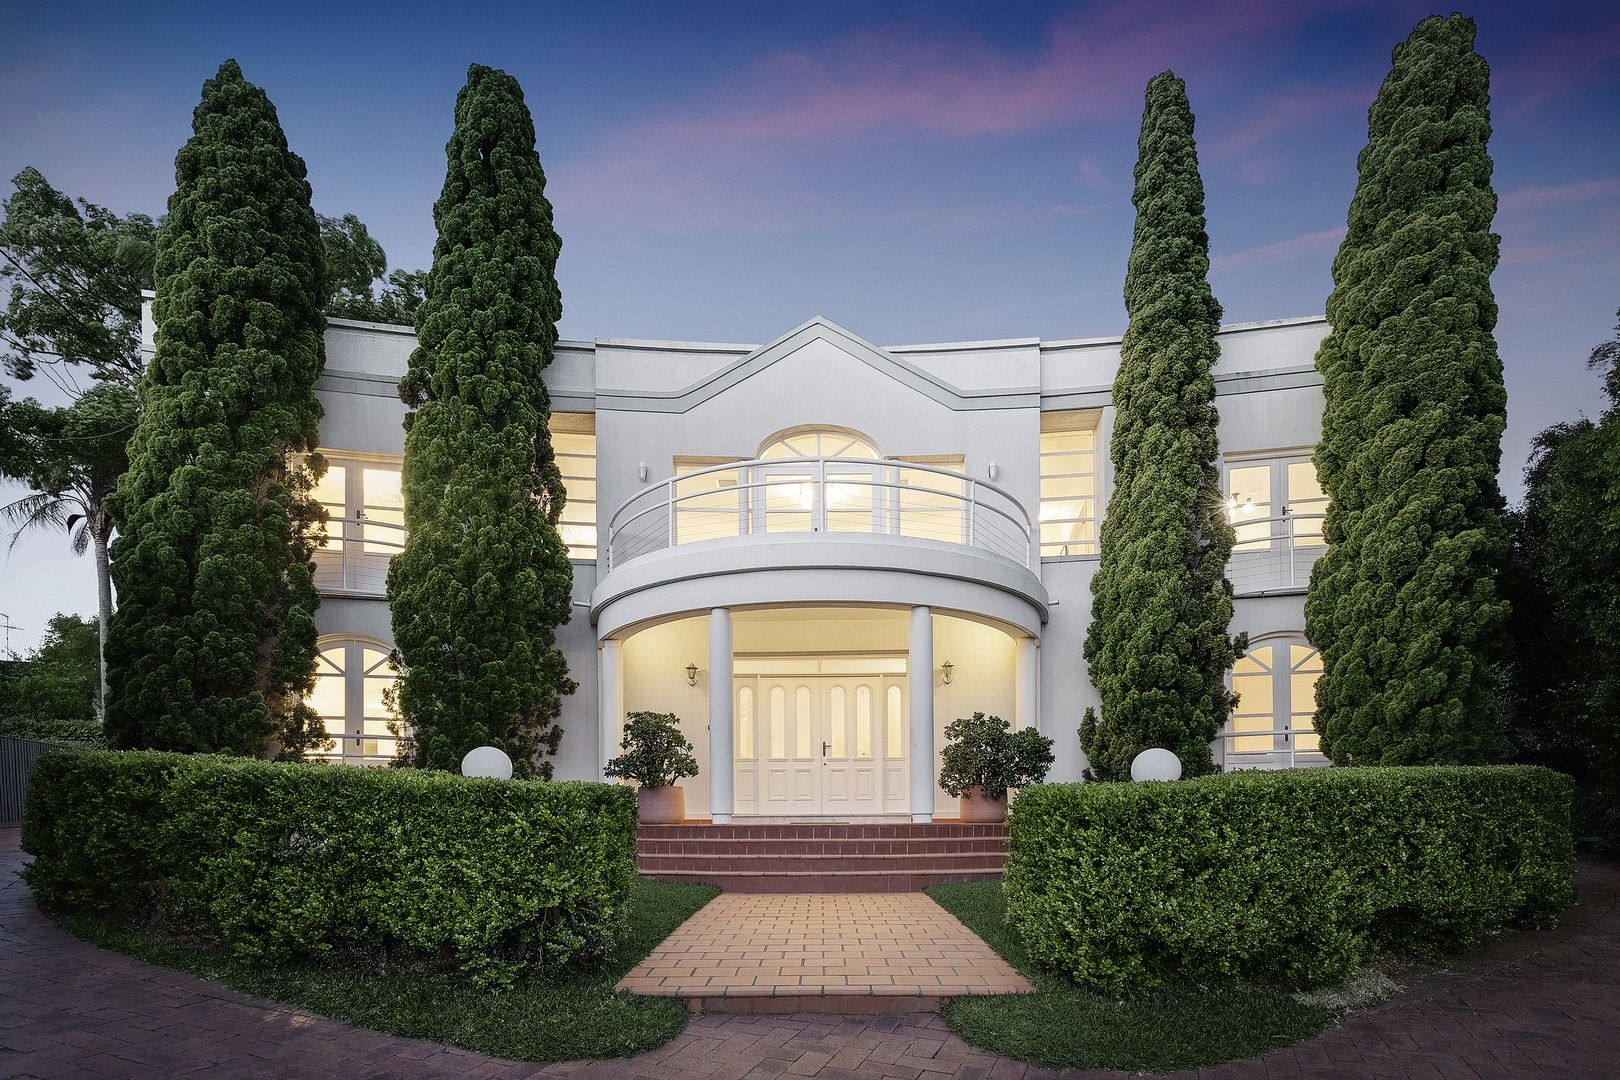

In [84]:
#Messsing around
pd.options.display.float_format = '{:,}'.format
import panel as pn
pn.extension('tabulator')
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
# from colorama import Fore, Back, Style
pn.extension()
float_input = pn.widgets.FloatInput(name='Postcode',step=1,start=2000)
bedroom=pn.widgets.IntSlider(name='Number of Rooms', start=0, end=20,step=1)
bathroom=pn.widgets.IntSlider(name='Number of Bathrooms', start=0, end=10,step=1)
carspace=pn.widgets.IntSlider(name='Number of Carspaces', start=0, end=10,step=1)

def my_panel(post=float_input,rooms=bedroom,bathroom=bathroom,carspace=carspace):
    po=post                               # to fill in postcode chosen
    be=rooms                                  # to fill in No. of bedrooms
    ca=carspace                                  # to fill in No. of carspaces
    ba=bathroom                                  # to fill in No. of bathrooms       
#     pt=100                              # to choose property type
#     Customer_Name = 'Tayla'               # to get customer name
    df_customer_sample = pd.DataFrame(columns=df_syd_housing1.columns)

    customer_selected_features = {'bedrooms':be,'bathrooms':ba,'carspaces':ca} #'propertyType':pt,
    customer_selected_features = pd.DataFrame.from_dict(customer_selected_features,orient='index').T
    mask1=df_syd_housing1['Postcode']==po
    search_feature_postcode = df_syd_housing1.loc[mask1,['income_ITR','Un_rate_%','renter_rate','Population_density_ppl_km2','Incidents of Robbery']].mean()
    search_feature_postcode = search_feature_postcode.to_frame().T

    df_customer_sample = pd.concat([customer_selected_features,search_feature_postcode ],axis=1)
    # df_customer_sample.index = df_customer_sample.index.rename('Customer_Name')
    df_customer_sample
    try:
        y_pred_1 = model.predict( df_customer_sample)
    except:
        y_pred_1=[0]

    df_customer_sample['Pred_Price'] = y_pred_1[0]
    df_customer_sample
    
    jpg_pane = pn.pane.JPG('./Resources/housepic.jpg', width=600)
    
    return pn.Column('Can I still afford my dream house?!?',jpg_pane,
                     pn.widgets.Tabulator(df_customer_sample.iloc[:,:-1]),
                  pn.indicators.Number(name='Predicted Price', format='${value:,d}',value = int(df_customer_sample['Pred_Price'].iloc[0]))
                  )
#.apply(lambda x: "{:,}".format(x['Value']), axis=1)

pn.interact(my_panel, post=float_input,rooms=bedroom,bathroom=bathroom,carspace=carspace) 

In [85]:
pn.interact(my_panel, post=float_input,rooms=bedroom,bathroom=bathroom,carspace=carspace).show()

Launching server at http://localhost:58215


## plot price True house price vs predicted price

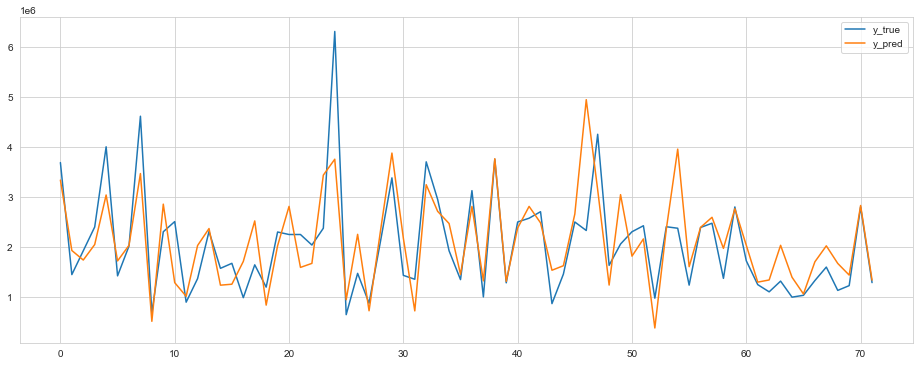

In [40]:
plt.subplots(figsize=(16,6))
x_points = list(range(len(y_test)))
plt.plot(x_points, y_test, label='y_true')

plt.plot(x_points, y_pred, label='y_pred')
plt.legend()
plt.show()

as seen from the above plot, our model is able to track the trend and give indications but able to track the high peak prices, due to not sufficient microeconomical level data points and craziness in Syd property market？

In [41]:
from sklearn.model_selection import learning_curve, ShuffleSplit

In [83]:
def plot_learning_curve(estimator, title, X,y, ylim=None, cv=None,
                       train_size=np.linspace(0.1, 1, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Traning Examples')
    plt.ylabel('score')
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_size)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std, alpha=0.1, color='red')
    
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std, alpha=0.1, color='green')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Score')
    
    plt.legend(loc='best')
    
    return plt
    

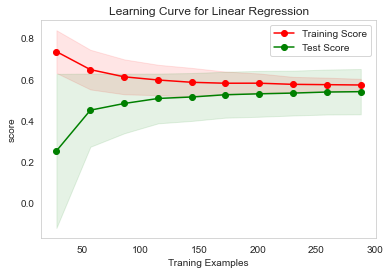

In [43]:
title = 'Learning Curve for Linear Regression'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
model = LinearRegression()
plot_learning_curve(model, title, X, y, ylim=(0.7, 1.01), cv=cv)
plt.show()

### as we increasing our training examples, test score initially increase,but after some point around sample 150, it become saturated which suggest, even if we get more training examples, it may not generate better outcome accuracy.

## Machine Learning Model Interpretability

In [44]:
from yellowbrick.regressor import ResidualsPlot

### Residuals Plot 

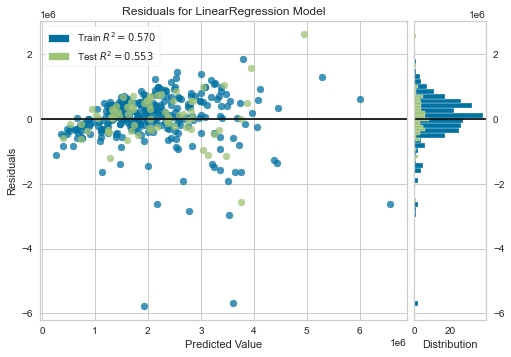

<Figure size 576x396 with 0 Axes>

In [46]:
#plot Train R2 vs Test R2
viz = ResidualsPlot(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()
plt.savefig('ResidualsPlot.png',bbox_inches='tight')

### although the distribution pattern is slightly right skewed, it displays a normal distribution pattern and suggest linear regression model is the right pick for this particular datatype, otherwise, we need a non_linear regressror

In [47]:
from yellowbrick.regressor import PredictionError

### Prediction Error Plot

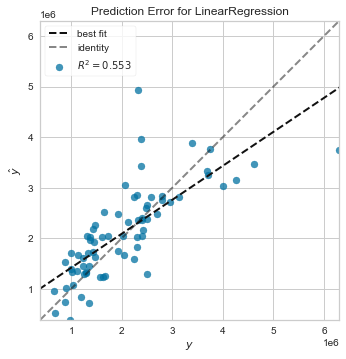

In [48]:
viz = PredictionError(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

#  Model Interpretability
### SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.

In [50]:
import shap

In [51]:
#initializing javaScript
shap.initjs()

In [52]:
explainer = shap.KernelExplainer(model.predict, X_test)

shap_values = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/72 [00:00<?, ?it/s]

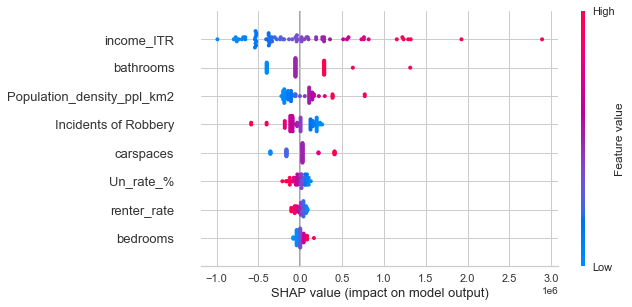

In [53]:
shap.summary_plot(shap_values, X_test)


### to sample twice to see how individual feature force push or pull the price from mean

In [65]:
i=16        
X_test.iloc[i]

bedrooms                                   4.0
bathrooms                                  2.0
carspaces                                  4.0
income_ITR                            53,589.0
Un_rate_%                    4.094712479971515
renter_rate                               0.15
Population_density_ppl_km2               756.5
Incidents of Robbery                      87.0
Name: 200, dtype: float64

In [55]:
model.predict(X_test).mean()

2117172.5508324867

In [72]:
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])

In [69]:
s=33         
X_test.iloc[s]

bedrooms                                   4.0
bathrooms                                  3.0
carspaces                                  2.0
income_ITR                            76,744.0
Un_rate_%                    2.415026833631485
renter_rate                               0.18
Population_density_ppl_km2             1,078.0
Incidents of Robbery                      35.0
Name: 78, dtype: float64

In [70]:
shap.force_plot(explainer.expected_value, shap_values[s], X_test.iloc[s])

In [73]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [74]:
df_syd_housing1.nlargest(5,'price')

,price,Postcode,suburb,bedrooms,bathrooms,carspaces,income_ITR,Un_rate_%,renter_rate,Population_density_ppl_km2,Incidents of Assault,Incidents of Robbery
416,"9,300,000.0",2036,little bay,5,4.0,4.0,69983,2.4063439978124146,0.2,"4,310.9",981.0,32.0
459,"9,200,000.0",2063,northbridge,5,5.0,2.0,168940,2.3317651871548373,0.25,"3,620.7",245.0,14.0
471,"7,700,000.0",2256,pearl beach,3,2.0,4.0,56022,2.1413276231263385,0.14,205.7,"3,032.0",64.0
365,"6,500,000.0",2046,five dock,4,2.0,4.0,88660,2.906050955414013,0.26,"4,846.1",263.0,7.0
363,"6,301,000.0",2094,fairlight,4,3.0,2.0,110090,2.267002518891688,0.18,"1,078.0",929.0,35.0


## Feature Selection with SHAP

In [76]:

features=['bedrooms','bathrooms','carspaces','income_ITR','Un_rate_%','renter_rate','Population_density_ppl_km2','Incidents of Robbery']

In [77]:
#to visualise if dropping any features give higher value of R2
def run_Linear_Regression(df):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(df_syd_housing1[features], df_syd_housing1['price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(df, df_syd_housing1['price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  




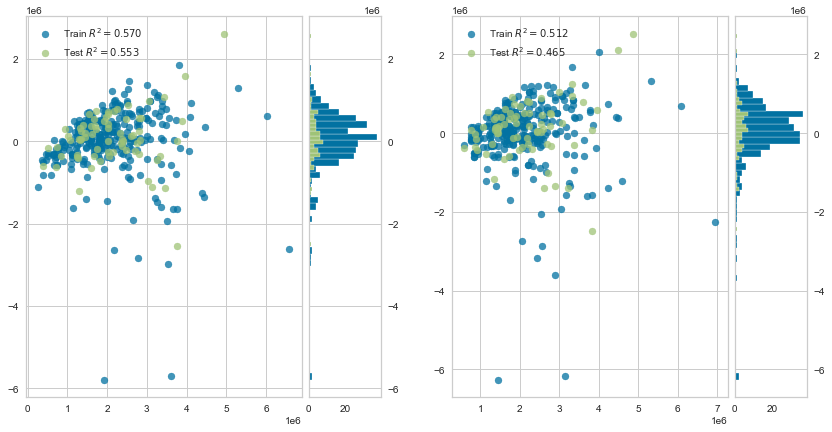

In [79]:

#to drop unemployment_rate, renter_rate
run_Linear_Regression(df_syd_housing1[['Population_density_ppl_km2','bathrooms','income_ITR']]) # it looks like these features are the most important ones

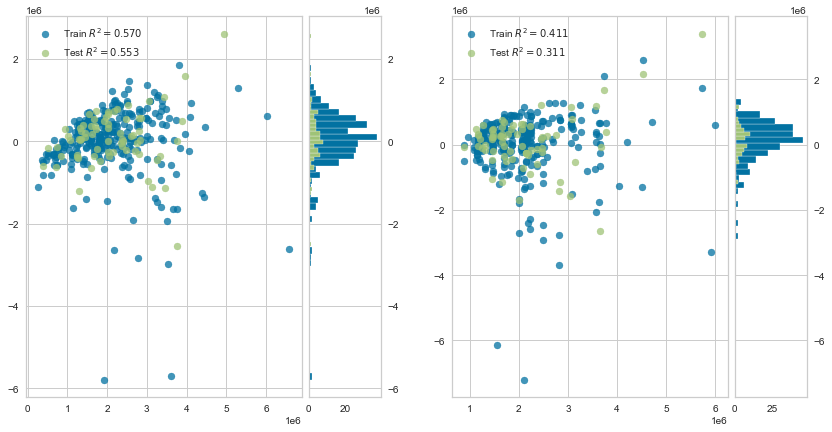

In [80]:
run_Linear_Regression(df_syd_housing1[['income_ITR']])  #according to our residual plot, individual income level is the most important feature impacting house price in Sydney, which make sense intuitively